In [7]:
from DataGenerationAndManagementClass import DataGenerationAndManagementClass

# 实例化数据生成与管理类
data_generator = DataGenerationAndManagementClass()

# 示例：生成某股票的历史数据并保存为CSV文件
# 训练数据
stock_symbol = "AAPL"  # 这里以苹果公司股票代码示例，可替换为其他股票代码
start_date = "2019-02-01"  # 开始日期，可按需修改
end_date = "2024-01-15"  # 结束日期，可按需修改
generated_stock_data = data_generator.generate_stock_data(stock_symbol, start_date, end_date)
file_path = "train_stock_data.csv"  # CSV文件保存路径，可按需修改
data_generator.save_data_to_csv(generated_stock_data, file_path)

# 测试数据
stock_symbol = "AAPL"  # 这里以苹果公司股票代码示例，可替换为其他股票代码
start_date = "2024-02-15"  # 开始日期，可按需修改
end_date = "2024-12-15"  # 结束日期，可按需修改
generated_stock_data = data_generator.generate_stock_data(stock_symbol, start_date, end_date)
file_path = "test_stock_data.csv"  # CSV文件保存路径，可按需修改
data_generator.save_data_to_csv(generated_stock_data, file_path)

True

In [8]:
from sklearn.model_selection import train_test_split
from stable_baselines3 import DQN
from stable_baselines3 import PPO
from StockTradingEnv import StockTradingEnv
import pandas as pd
import numpy as np

# 加载数据
train_data = pd.read_csv('train_stock_data.csv') # 股票历史数据，包含开盘价、收盘价等
train_data = train_data.drop(columns=['Date', 'Index'])

test_data = pd.read_csv('test_stock_data.csv') # 股票历史数据，包含开盘价、收盘价等
test_data = test_data.drop(columns=['Date', 'Index'])


# 创建训练环境和测试环境
train_env = StockTradingEnv(train_data)
test_env = StockTradingEnv(test_data)


In [9]:
# 训练 DQN
model = DQN("MlpPolicy",
            train_env,
            verbose=1,
            policy_kwargs={'net_arch': [64, 32, 10]},
            learning_rate=0.0001,
            exploration_fraction=0.3,
            exploration_initial_eps=0.5,
            exploration_final_eps=0.1
            )
# model = PPO('MlpPolicy', train_env, verbose=1)
model.learn(total_timesteps=50000)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


d:\ANACONDA\lib\site-packages\stable_baselines3\common\vec_env\patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 1.81e+03  |
|    ep_rew_mean      | -6.17e+04 |
|    exploration_rate | 0.307     |
| time/               |           |
|    episodes         | 4         |
|    fps              | 595       |
|    time_elapsed     | 12        |
|    total_timesteps  | 7236      |
| train/              |           |
|    learning_rate    | 0.0001    |
|    loss             | 15.1      |
|    n_updates        | 1783      |
-----------------------------------
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 1.81e+03  |
|    ep_rew_mean      | -4.31e+04 |
|    exploration_rate | 0.114     |
| time/               |           |
|    episodes         | 8         |
|    fps              | 592       |
|    time_elapsed     | 24        |
|    total_timesteps  | 14472     |
| train/              |           |
|    learning_rate    | 0.0001    |
|    loss             | 11.6

In [10]:
# 测试智能体
obs = test_env.reset()
d = {0: '买入', 1: '卖出', 2: '持有'}
profit = []
days = 100
for i in range(days):
    action, _states = model.predict(obs, deterministic=True)
    print(f'action = {d[action.item()]}')
    obs, reward, done, info = test_env.step(action)
    profit.append(info['total_asset'] - test_env.initial_balance)
    print(info)
    print(f'reward = {reward}')
    print()
    if done:
        days = i
        break

action = 买入
{'total_asset': 9990.063380000001, 'day': 0}
reward = 0.0

action = 卖出
{'total_asset': 10489.956420000002, 'day': 1}
reward = 0.0

action = 买入
{'total_asset': 10479.540630000003, 'day': 2}
reward = 0.0

action = 卖出
{'total_asset': 10774.998660000003, 'day': 3}
reward = 0.0

action = 买入
{'total_asset': 10764.357900000005, 'day': 4}
reward = 0.0

action = 卖出
{'total_asset': 11077.093440000006, 'day': 5}
reward = 0.0

action = 买入
{'total_asset': 11066.152770000008, 'day': 6}
reward = 0.0

action = 卖出
{'total_asset': 11339.237790000008, 'day': 7}
reward = 0.0

action = 买入
{'total_asset': 11328.00789000001, 'day': 8}
reward = 0.0

action = 卖出
{'total_asset': 11616.937530000007, 'day': 9}
reward = 0.0

action = 买入
{'total_asset': 11605.386510000008, 'day': 10}
reward = 0.0

action = 卖出
{'total_asset': 11000.069850000007, 'day': 11}
reward = 0.0

action = 买入
{'total_asset': 10989.127770000008, 'day': 12}
reward = 0.0

action = 卖出
{'total_asset': 11690.872290000008, 'day': 13}
rewa

Final Profit: -1396.5204299999514


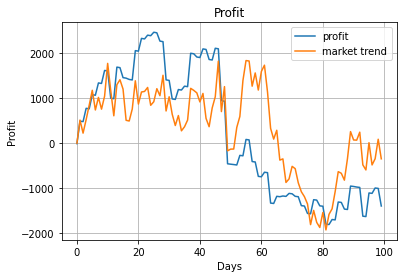

In [11]:
from Visualization import Visualizer
prices = list(pd.read_csv('test_stock_data.csv')['Close'])[:days]
visualizer = Visualizer()
visualizer.visualize(prices, profit)
print(f"Final Profit: {profit[-1]}")